In [1]:
# -------------------- Imports -------------------- #

from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np, pandas as pd, os
from prettytable import PrettyTable

In [2]:
# -------------------- Globals and Configs -------------------- #

feature_names = list()
for index in range(1, 6):
    feature_names.extend(["Suit"+str(index), "Rank"+str(index)])

feature_names.append('class')


training_input_file = os.path.abspath('../datasets/csv/train.csv')
testing_input_file = os.path.abspath('../datasets/csv/test.csv')

np.random.seed(666)     # seed for reproducible results

# To store configs
class myConfigs:
    features = 0
    classes = 0


config = myConfigs()

In [3]:
# -------------------- Data -------------------- #

train_data = pd.read_csv(training_input_file, names=feature_names)
test_data = pd.read_csv(testing_input_file, names=feature_names)

# Get features of data
config.features = len(train_data.columns) - 1
config.classes = len(set(train_data['class']))

# Shuffle training data
train_data = train_data.sample(frac=1).reset_index(drop=True)

# Seperate data and classes
train_y = np.array(train_data['class'])
train_x = np.array(train_data.drop('class', 1))

test_y = np.array(test_data['class'])
test_x = np.array(test_data.drop('class', 1))

# Initialise scaler to scale the data
scaler = StandardScaler()

train_set = np.empty(train_x.shape, dtype = float)
test_set = np.empty(test_x.shape, dtype = float)

# Make training data suitable for scaling
for index in range(len(train_x)):
    train_set[index] = train_x[index].astype(float)

# Make testing data suitable for scaling
for index in range(len(test_x)):
    test_set[index] = test_x[index].astype(float)

# Fit the training data
scaler.fit(train_set)  

# Scale the training and testing data w.r.t scaler
data_train = scaler.transform(train_set)
data_test = scaler.transform(test_set)

tab = PrettyTable(['Config', 'Value'])
configs = vars(config)

for key in configs:
    tab.add_row([key, configs[key]])
print(tab)

print("Instances in training data :", len(train_data))
print("Instances in testing data :", len(test_data))

+----------+-------+
|  Config  | Value |
+----------+-------+
| features |   10  |
| classes  |   10  |
+----------+-------+
Instances in training data : 25010
Instances in testing data : 1000000


In [4]:
# -------------------- Model -------------------- #

# Store the accuracies
accuracy = list()

# Store the predictions
predictions = list()

for trial in range(5):
    classifier = MLPClassifier(solver = 'adam', alpha = 1e-5, hidden_layer_sizes = (64, 64), activation = 'tanh', learning_rate_init = 0.02, max_iter = 2000, random_state = trial)
    result = classifier.fit(data_train, train_y)
    prediction = classifier.predict(data_test)
    predictions.append(prediction)
    curr_accuracy = accuracy_score(test_y, prediction)
    accuracy.append(curr_accuracy)


In [5]:
# -------------------- Print the final result -------------------- #

tab = PrettyTable(['Trial Number', 'Accuracy'])

for trial in range(len(accuracy)):
    tab.add_row([trial + 1, round(accuracy[trial] * 100, 3)])

print("\n", tab)
print("\nMean Accuracy using Multi Layer Perceptron Classifier: ", round(np.array(accuracy).mean() * 100, 3), "%")


 +--------------+----------+
| Trial Number | Accuracy |
+--------------+----------+
|      1       |  94.552  |
|      2       |  97.447  |
|      3       |  92.196  |
|      4       |  98.57   |
|      5       |  98.777  |
+--------------+----------+

Mean Accuracy using Multi Layer Perceptron Classifier:  96.308 %


Trial    : 1
Accuracy : 94.552


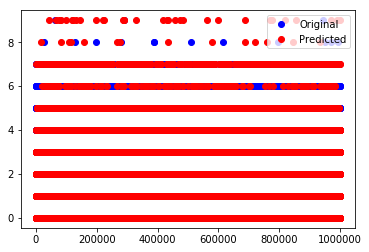

Trial    : 2
Accuracy : 97.447


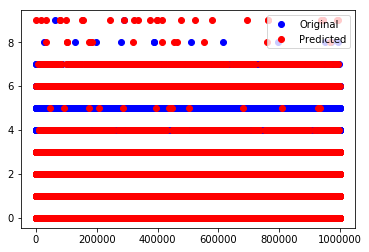

Trial    : 3
Accuracy : 92.196


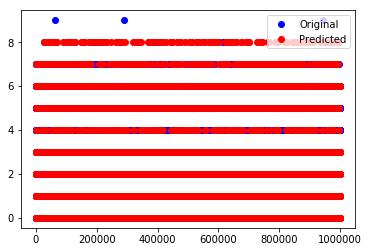

Trial    : 4
Accuracy : 98.57


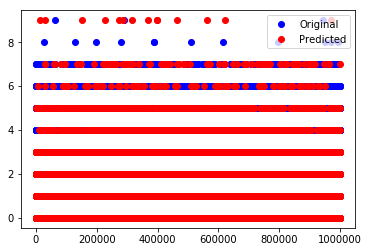

Trial    : 5
Accuracy : 98.777


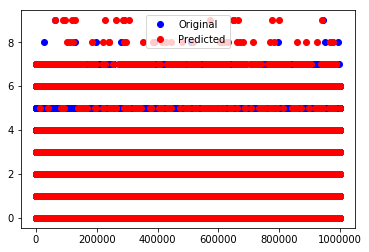

In [6]:
# -------------------- Visualisations -------------------- #

for index in range(len(predictions)):
    print("Trial    :", index + 1)
    print("Accuracy :", round(accuracy[index] * 100, 3))
    plt.plot(test_y, 'bo', label = "Original")
    plt.plot(predictions[index], 'ro', label = "Predicted")
    plt.legend()
    plt.show()

In [8]:
preds = predictions[-1]
confMat = [[0] * config.classes for x in range(config.classes)]

for i in range(len(preds)):
    predLabel = preds[i]
    actLabel = test_y[i]
    confMat[actLabel][predLabel] += 1

header = [""]
for l in range(config.classes):
    header.append("Pred " + str(l))
    
tab = PrettyTable(header)
l = 0
for c in confMat:
    tab.add_row(["Real " + str(l)] + c)
    l += 1

print(tab)

+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|        | Pred 0 | Pred 1 | Pred 2 | Pred 3 | Pred 4 | Pred 5 | Pred 6 | Pred 7 | Pred 8 | Pred 9 |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
| Real 0 | 500856 |   14   |   0    |   0    |  273   |   48   |   0    |   0    |   6    |   12   |
| Real 1 |   0    | 422369 |   84   |   0    |   24   |   0    |   0    |   0    |   18   |   3    |
| Real 2 |   0    |   15   | 47393  |  201   |   0    |   0    |   3    |   10   |   0    |   0    |
| Real 3 |   0    |   0    |  4499  | 16184  |   0    |   0    |  266   |  172   |   0    |   0    |
| Real 4 |  3518  |   9    |   0    |   0    |  353   |   0    |   0    |   0    |   5    |   0    |
| Real 5 |  1944  |   1    |   0    |   0    |   6    |   41   |   0    |   0    |   3    |   1    |
| Real 6 |   0    |   0    |   1    |  877   |   0    |   0    |  545   |   1    |   0    |